
**Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?**

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

**Title: Haberman's Survival Data**
https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

**Attribute Information:**
   1. APTO: Age of patient at time of operation (numerical)
   2. PYO: Patient's year of operation (year - 1900, numerical)
   3. NPAND: Number of positive axillary nodes detected (numerical)
   4. SS: Survival status (class attribute)
   
         1 = the patient survived 5 years or longer
         
         2 = the patient died within 5 year

Missing Attribute Values: None

**----------------------------------------------------------------------------------------------**

In [335]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [336]:
data_path = ("https://raw.githubusercontent.com/DMiller78/Deeper-Supervised-Learning/master/Deeper%20into%20Supervised%20Learning/HB_data")
hb = pd.read_csv(data_path, delimiter= ',', header=None)

# **KNN and KNN-regression model**

In [337]:
hb.columns = ['APTO', 'PYO', 'NPAND', 'SS']

hb.head()

,APTO,PYO,NPAND,SS
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [338]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
APTO     306 non-null int64
PYO      306 non-null int64
NPAND    306 non-null int64
SS       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


**Seaborn Correlation Heatmap**

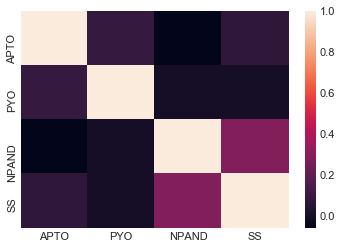

In [339]:
sns.heatmap(hb.corr())

**KNN Nearest Neighbor**

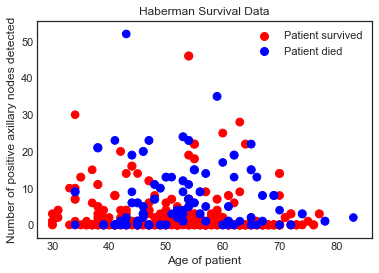

In [340]:
# 1 = the patient survived 5 years or longer 
# 2 = the patient died within 5 year

plt.scatter(
    hb[hb['SS'] == 1].APTO,
    hb[hb['SS'] == 1].NPAND,
    hb[hb['SS'] == 1].PYO,
    color='red'
)
plt.scatter(
    hb[hb['SS'] == 2].APTO,
    hb[hb['SS'] == 2].NPAND,
    hb[hb['SS'] == 2].PYO,
    color='blue'
)
plt.legend(['Patient survived', 'Patient died'])
plt.title('Haberman Survival Data')
plt.xlabel('Age of patient')
plt.ylabel('Number of positive axillary nodes detected')
plt.show()

**K-Nearest Neighbor**

In [341]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = hb[['APTO', 'NPAND']]
Y = hb.SS
neighbors.fit(X,Y)

neighbors.predict([[30, 35]])

array([1], dtype=int64)

In [342]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = hb[['APTO', 'NPAND']]
Y = hb.SS
neighbors.fit(X,Y)

print(neighbors.predict([[30, 35]]))
print(neighbors.predict_proba([[30, 35]]))

[2]
[[0.4 0.6]]


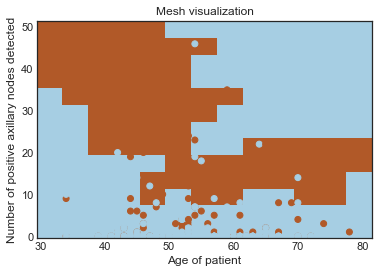

In [343]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Age of patient')
plt.ylabel('Number of positive axillary nodes detected')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Any new point that fell within the blue area would  be predicted patients survived longer then 5 years. Any new point that fell within the brown area would be predicted patient died before 5 years. This is significant because most major operations of axillary node patients survived longer then 5 years after the operations. 

**Weighing KNN**

In [344]:
X = hb[['APTO', 'NPAND']]

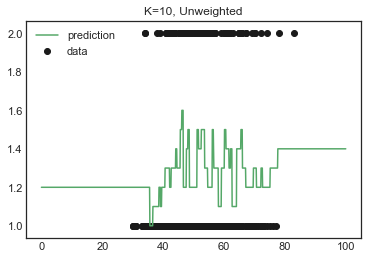

In [345]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(hb.APTO)
Y = hb.SS
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 100, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

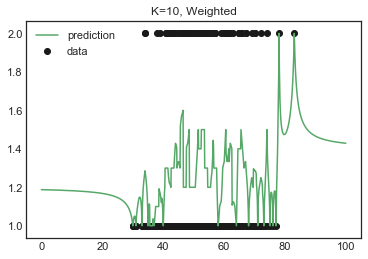

In [346]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(hb.APTO)
Y = hb.SS
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 100, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [347]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.32 (+/- 0.24)
Weighted Accuracy: -0.34 (+/- 0.23)


In [348]:
from sklearn.preprocessing import StandardScaler

In [349]:
scaler = StandardScaler()

In [350]:
scaler.fit(hb.drop('SS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [351]:
scaled_features = scaler.transform(hb.drop('SS',axis=1))

In [352]:
hb_feat = pd.DataFrame(scaled_features,columns=hb.columns[:-1])
hb_feat.head()

,APTO,PYO,NPAND
0,-2.082140,0.353584,-0.421592
1,-2.082140,-0.262921,-0.142959
2,-2.082140,0.661837,-0.560909
3,-1.989426,-1.187680,-0.282275
4,-1.989426,0.661837,-0.003642


In [353]:
from sklearn.model_selection import train_test_split

In [354]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,hb['SS'],
                                                    test_size=0.30)

In [355]:
from sklearn.neighbors import KNeighborsClassifier

In [356]:
knn = KNeighborsClassifier(n_neighbors=1)

In [357]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [358]:
pred = knn.predict(X_test)

In [359]:
from sklearn.metrics import classification_report,confusion_matrix

In [360]:
print(confusion_matrix(y_test,pred))

[[54 19]
 [12  7]]


In [361]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.82      0.74      0.78        73
          2       0.27      0.37      0.31        19

avg / total       0.70      0.66      0.68        92



**Choosing a K value** 

Previous KNN material I learned from a Udemy course on data science. 

Below I created a **for loop** that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. This plotted in a graph below. 

In [362]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

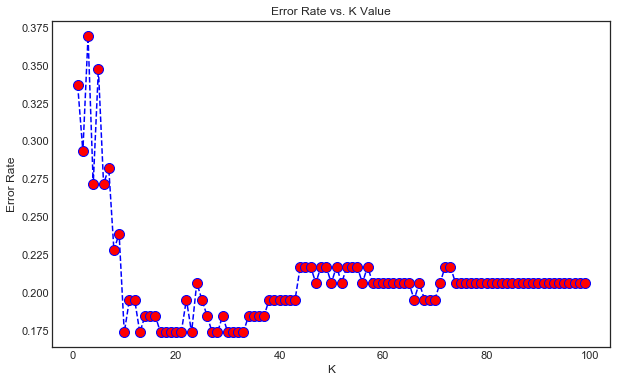

In [363]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

When you increase the K the Error rate decreases. This plot gives us insights into selecting a K value for our model. From the plot above we can see that 15-20 and roughly 25-30 will be our best K values for our model. Beyond 60 K the error rate stays the same. This tells us that increasing the K beyond 30 is not recommended. 

**Retraining our model** 

By adjusting the K. Changed from 30 to 25 gave us a better evaluators for our model. 

In [364]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[70  3]
 [15  4]]


             precision    recall  f1-score   support

          1       0.82      0.96      0.89        73
          2       0.57      0.21      0.31        19

avg / total       0.77      0.80      0.77        92



In [365]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3613554470940412
MSE: 0.17882181653834106
RMSE: 0.42287328662182133


# **OLS Linear regression Model comparison**


In [366]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [367]:
data_path = ("https://raw.githubusercontent.com/DMiller78/Deeper-Supervised-Learning/master/Deeper%20into%20Supervised%20Learning/HB_data")
ols_hb = pd.read_csv(data_path, delimiter= ',', header=None)

In [368]:
ols_hb.columns = ['APTO', 'PYO', 'NPAND', 'SS']

ols_hb.head()

,APTO,PYO,NPAND,SS
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Histogram of Age of patients by Survival status**

C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


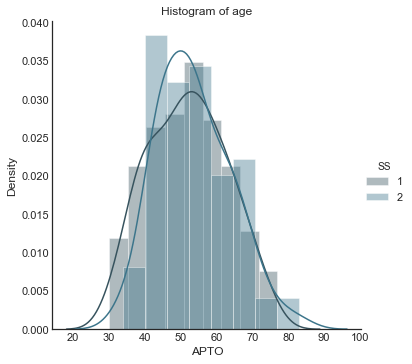

In [369]:
sns.FacetGrid(ols_hb, hue = "SS", size = 5).map(sns.distplot, "APTO").add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


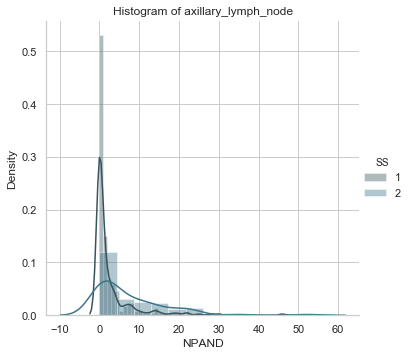

'Over 50% of patients who survived had a 0-5 Number of positive axillary nodes detected'

In [370]:
sns.set()
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.FacetGrid(ols_hb, hue = "SS", size = 5).map(sns.distplot, "NPAND").add_legend()
plt.title("Histogram of axillary_lymph_node")
plt.ylabel("Density")
plt.show()

"""Over 50% of patients who survived had a 0-5 Number of positive axillary nodes detected"""

Using the .loc to find the max value of NPAND (axillary lymph node). Located row 62. 

    APTO  PYO  NPAND  SS
62    43   58     52   2


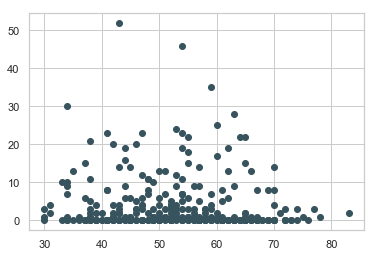

In [371]:
print(ols_hb.loc[ols_hb['NPAND']==max(ols_hb['NPAND']),:])

plt.scatter(ols_hb['APTO'],ols_hb['NPAND'])
plt.show()

In [372]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

** Seaborn Regplot using Logistic regression**

C:\Users\mille\Conda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\mille\Conda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\mille\Conda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


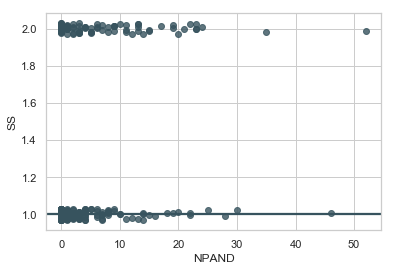

In [373]:
ax = sns.regplot(x="NPAND", y="SS", data=ols_hb,
                 logistic=True, n_boot=800, y_jitter=.03)

Restating attribute information: 

APTO: Age of patient at time of operation (numerical)
PYO: Patient's year of operation (year - 1900, numerical)
NPAND: Number of positive axillary nodes detected (numerical)
SS: Survival status (class attribute)

1 = the patient survived 5 years or longer

2 = the patient died within 5 year

Missing Attribute Values: None

**$$ Survival status(SS) = \alpha + APTO + PYO + NPAND $$**

In [374]:
y = ols_hb['SS']

In [375]:
X = ols_hb[['APTO', 'PYO', 'NPAND']]

In [376]:
from sklearn.model_selection import train_test_split

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [378]:
from sklearn.linear_model import LinearRegression

In [379]:
lm = LinearRegression()

In [380]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [381]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.00459208 -0.00791535  0.01497846]


In [382]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

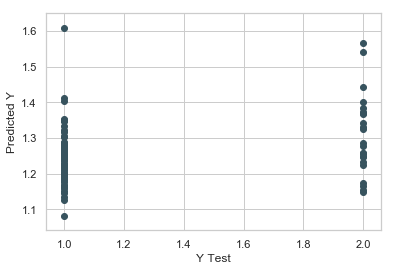

In [383]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [384]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3526740607434687
MSE: 0.17014043018776856
RMSE: 0.41248082402430364


C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


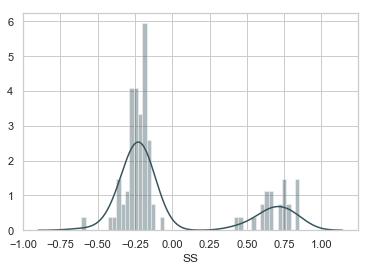

In [385]:
sns.distplot((y_test-predictions),bins=50);

In [386]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
APTO,0.004592
PYO,-0.007915
NPAND,0.014978


**OLS linear form regression**

In [387]:
est = smf.ols('SS ~ NPAND', ols_hb).fit()
est.summary().tables[1]



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1937,0.028,42.951,0.000,1.139,1.248
NPAND,0.0176,0.003,5.219,0.000,0.011,0.024


In [388]:
est = smf.ols('SS ~ APTO', ols_hb).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1189,0.125,8.926,0.000,0.872,1.366
APTO,0.0028,0.002,1.187,0.236,-0.002,0.007


**Summary statistics for the OLS linear regression model**

In [389]:
est = smf.ols('SS ~ APTO + NPAND + PYO', ols_hb).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SS   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     9.932
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.90e-06
Time:                        21:00:39   Log-Likelihood:                -169.40
No. Observations:                 306   AIC:                             346.8
Df Residuals:                     302   BIC:                             361.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1030      0.476      2.315      0.021       0.165       2.041
APTO           0.0036      0.002      1.583      0.114      -0.001       0.008
NPAND          0.0180      0.003      5.313      0.000       0.011       0.025
PYO           -0.0016      0.007     -0.209      0.835      -0.016       0.013
==============================================================================
Omnibus:                       41.450   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.739
Skew:                           0.966   Prob(JB):                     9.60e-12
Kurtosis:                       2.504   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [390]:
linear_formula = 'SS ~ APTO + NPAND + PYO'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=ols_hb).fit()

**Coefficients**

In [391]:
lm.params

Intercept    1.103030
APTO         0.003577
NPAND        0.017963
PYO         -0.001563
dtype: float64

**p-values**

From our p-values both APTO and PYO do not have much affect. Only the NPAND (Number of positive axillary nodes detected) has a significant p-value for the SS (Survival Status). 

In [392]:
lm.pvalues

Intercept    2.127182e-02
APTO         1.144139e-01
NPAND        2.099980e-07
PYO          8.349209e-01
dtype: float64

**R-Squared value**

Low R2 value: 0.08980399558307228

In [393]:
lm.rsquared

0.08980399558307228

**Confidence Intervals**

0 - lower bound
1- upper bound 

In [394]:
lm.conf_int()

,0,1
Intercept,0.165490,2.040570
APTO,-0.000869,0.008022
NPAND,0.011309,0.024616
PYO,-0.016315,0.013188


**Plotting CI**

Level of precision with from our confidence intervals. 

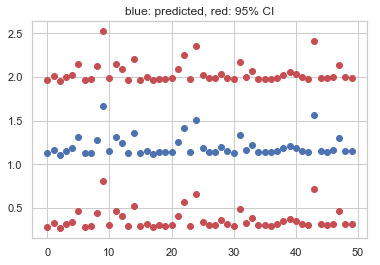

In [395]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:50], 'o', color='r')
plt.plot(iv_l[0:50], 'o', color='r')
plt.plot(lm.fittedvalues[0:50], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

**Multiple linear regression**

In [396]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [397]:
regr = skl_lm.LinearRegression()

X = ols_hb[['APTO', 'NPAND']].as_matrix()
y = ols_hb.SS

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.00353456 0.01796119]
1.006977462547574


C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [398]:
regr = skl_lm.LinearRegression()

# Linear fit
X = ols_hb.NPAND.values.reshape(-1,1)
y = ols_hb.SS
regr.fit(X, y)

ols_hb['pred1'] = regr.predict(X)
ols_hb['resid1'] = ols_hb.y = ols_hb.SS - ols_hb.pred1

# Quadratic fit
X2 = ols_hb[['NPAND', 'APTO']].as_matrix()
regr.fit(X2, y)

ols_hb['pred2'] = regr.predict(X2)
ols_hb['resid2'] = ols_hb.SS - ols_hb.pred2

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


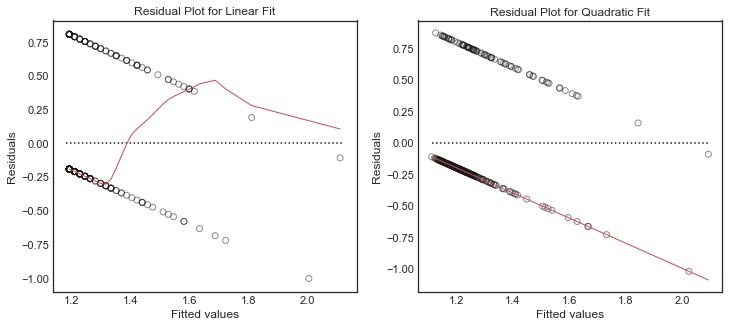

In [399]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(ols_hb.pred1, ols_hb.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(ols_hb.pred2, ols_hb.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

# **Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?**

**OLS Regression Model**

    Mean Absolute Error: 0.3526740607434687 [Lower magnitude of errors]
    Mean Squared Error: 0.17014043018776856 [Lower MSE is better]
    Root Mean Squared Error: 0.41248082402430364 [Lower RMSE is better fit]

**p-values**

    Intercept    2.127182e-02
    APTO         1.144139e-01

**NPAND        2.099980e-07**

    PYO          8.349209e-01

**R-Squared value**

    Low R2 value: 0.08980399558307228

***

**KNN Regression Model**

    Mean Absolute Error: 0.3991359301641234
    Mean Squared Error: 0.21660229960842334
    Root Mean Squared Error: 0.4654055216780559

**Evaluators**

    K=25
    precision - 0.73 
    recall  - 0.74 
    f1-score - 0.68
    support - 92

    Unweighted Accuracy: -0.32 (+/- 0.24)
    Weighted Accuracy: -0.34 (+/- 0.23)



***

KNN regression is a simple model best used for continous data used with binary attritrube. The KNN regression model for this data set produced lower MAE, MSE, and RMSE values when compared to the linear regression model. 

KNN model only did a 32-34% accuracy at predicting the result. Any new point that fell within the blue area would  be predicted patients survived longer then 5 years. Any new point that fell within the brown area would be predicted patient died before 5 years. This is significant because most major operations of axillary node patients survived longer then 5 years after the operations. 

Using some code from a Udemy course on KNN, I added a piece of code uses a **for loop** that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. This was a very useful additon to the KNN model and allows one to do a better job in selecting a k value. 

"KNN algorithm uses a weighted average of k nearest neighbours and computes the Euclidean distance from the input value to labelled value. Root mean square error (RMSE) and mean square error (R2) are used to select the optimal number of k while doing cross-validation of the purposed model." 
(https://github.com/dinesh2043/KNN_And_Linear_Regression)

***

The OLS regression model had a slightly higher MAE, MSE, and RMSE. Which indicates that this model did a better job fitting the data. The differece between 0.01-0.05 it is not a huge difference. Evenly though this model is a better fit it may not make much significant difference. It is concerning that the R-squared value (lm.rsquared) was so low (0.08980399558307228). Which means that there is a very weak linear relationship within the data. Calculating the p-values (lm.pvalues) showed only NPAND the lymph node disorder to have an effect on whether or not the patients lived longer then 5 years after their operations. 

"Simply linear regression of one dependent and one independent variable is defined by the formula y = c + b*x, where y is dependent variable, b is a regression coefficients and x is an independent variable. Linear regression is conducted by analysing the correlation of the data, model estimation and cross validation to estimate the usefulness of the model." (https://github.com/dinesh2043/KNN_And_Linear_Regression)

# **Conclusion**
In conclusion, this data set did not provide clear distinction between the models. OLS model was only slightly better then the KNN regression model. This data set requires a logrithmic or PCA could provide more insights into this data set. Based off these two models I would lean towards OLS model since it is slightly better. It also provides some useful p-value analysis determining that the NPAND variable was the most significant with the Survival Status. 